In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [11]:
df = pd.read_csv("/content/Stress_Dataset.csv")
df.head()


,Gender,Age,Have you recently experienced stress in your life?,Have you noticed a rapid heartbeat or palpitations?,Have you been dealing with anxiety or tension recently?,Do you face any sleep problems or difficulties falling asleep?,Have you been dealing with anxiety or tension recently?.1,Have you been getting headaches more often than usual?,Do you get irritated easily?,Do you have trouble concentrating on your academic tasks?,...,Are you facing any difficulties with your professors or instructors?,Is your working environment unpleasant or stressful?,Do you struggle to find time for relaxation and leisure activities?,Is your hostel or home environment causing you difficulties?,Do you lack confidence in your academic performance?,Do you lack confidence in your choice of academic subjects?,Academic and extracurricular activities conflicting for you?,Do you attend classes regularly?,Have you gained/lost weight?,Which type of stress do you primarily experience?
0,0,20,3,4,2,5,1,2,1,2,...,3,1,4,1,2,1,3,1,2,Eustress (Positive Stress) - Stress that motiv...
1,0,20,2,3,2,1,1,1,1,4,...,3,2,1,1,3,2,1,4,2,Eustress (Positive Stress) - Stress that motiv...
2,0,20,5,4,2,2,1,3,4,2,...,2,2,2,1,4,1,1,2,1,Eustress (Positive Stress) - Stress that motiv...
3,1,20,3,4,3,2,2,3,4,3,...,1,1,2,1,2,1,1,5,3,Eustress (Positive Stress) - Stress that motiv...
4,0,20,3,3,3,2,2,4,4,4,...,2,3,1,2,2,4,2,2,2,Eustress (Positive Stress) - Stress that motiv...


In [12]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 843 entries, 0 to 842
Data columns (total 26 columns):
 #   Column                                                                Non-Null Count  Dtype 
---  ------                                                                --------------  ----- 
 0   Gender                                                                843 non-null    int64 
 1   Age                                                                   843 non-null    int64 
 2   Have you recently experienced stress in your life?                    843 non-null    int64 
 3   Have you noticed a rapid heartbeat or palpitations?                   843 non-null    int64 
 4   Have you been dealing with anxiety or tension recently?               843 non-null    int64 
 5   Do you face any sleep problems or difficulties falling asleep?        843 non-null    int64 
 6   Have you been dealing with anxiety or tension recently?.1             843 non-null    int64 
 7   Have you

In [13]:
df.isnull().sum()


,0
Gender,0
Age,0
Have you recently experienced stress in your life?,0
Have you noticed a rapid heartbeat or palpitations?,0
Have you been dealing with anxiety or tension recently?,0
Do you face any sleep problems or difficulties falling asleep?,0
Have you been dealing with anxiety or tension recently?.1,0
Have you been getting headaches more often than usual?,0
Do you get irritated easily?,0
Do you have trouble concentrating on your academic tasks?,0


In [16]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['Which type of stress do you primarily experience?'] = encoder.fit_transform(df['Which type of stress do you primarily experience?'])


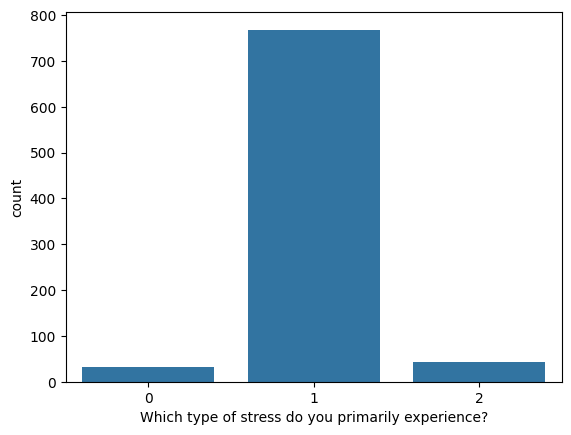

In [17]:
sns.countplot(x='Which type of stress do you primarily experience?', data=df)
plt.show()


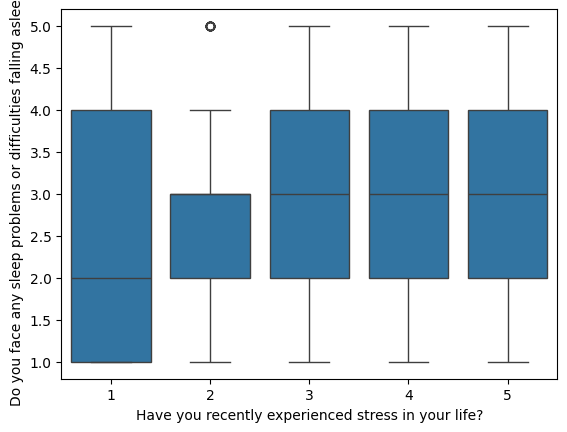

In [19]:
sns.boxplot(x='Have you recently experienced stress in your life?', y='Do you face any sleep problems or difficulties falling asleep?', data=df)
plt.show()


In [20]:
X = df.drop('Which type of stress do you primarily experience?', axis=1)
y = df['Which type of stress do you primarily experience?']

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [23]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [24]:
y_pred = model.predict(X_test)

In [25]:
from sklearn.metrics import accuracy_score, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9940828402366864
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       0.99      1.00      1.00       156
           2       1.00      0.86      0.92         7

    accuracy                           0.99       169
   macro avg       1.00      0.95      0.97       169
weighted avg       0.99      0.99      0.99       169



In [26]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

dt_pred = dt.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_pred))


Decision Tree Accuracy: 1.0
